In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
#1. 캐글 데이터 셋 로드
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
0,1022.0,1053.6,1240.2,1217.0,1165.3,1185.6,1005.0,1070,1220,1200,...,1370,6548,541.2,17.1,14.5,18.0,34.5,4.3,53.6,501
1,1019.2,1009.0,1215.5,1190.7,1133.6,1156.2,1005.0,1070,1210,1200,...,2299,6548,505.2,13.7,15.8,20.3,35.2,13.2,48.2,618
2,725.9,710.3,802.1,796.5,853.8,775.3,1050.2,1070,1200,1180,...,1900,3778,419.1,10.0,9.3,9.8,15.0,8.2,30.4,500
3,980.1,1032.2,1215.5,1189.0,1136.4,1161.0,1005.0,1070,1220,1210,...,2164,6465,529.1,15.7,14.9,18.0,36.4,12.7,49.0,605
4,1042.2,1023.1,1237.0,1183.7,1153.2,1103.4,1005.0,1070,1210,1200,...,988,4624,549.8,8.8,7.0,15.0,20.0,3.0,40.4,501


In [9]:
# Check for missing values
train_df.isnull().sum()

,0
DEGC1PV,0
DEGC2PV,0
DEGC3PV,0
DEGC4PV,0
DEGC5PV,0
DEGC6PV,0
DEGC1SV,0
DEGC2SV,0
DEGC3SV,0
DEGC4SV,0


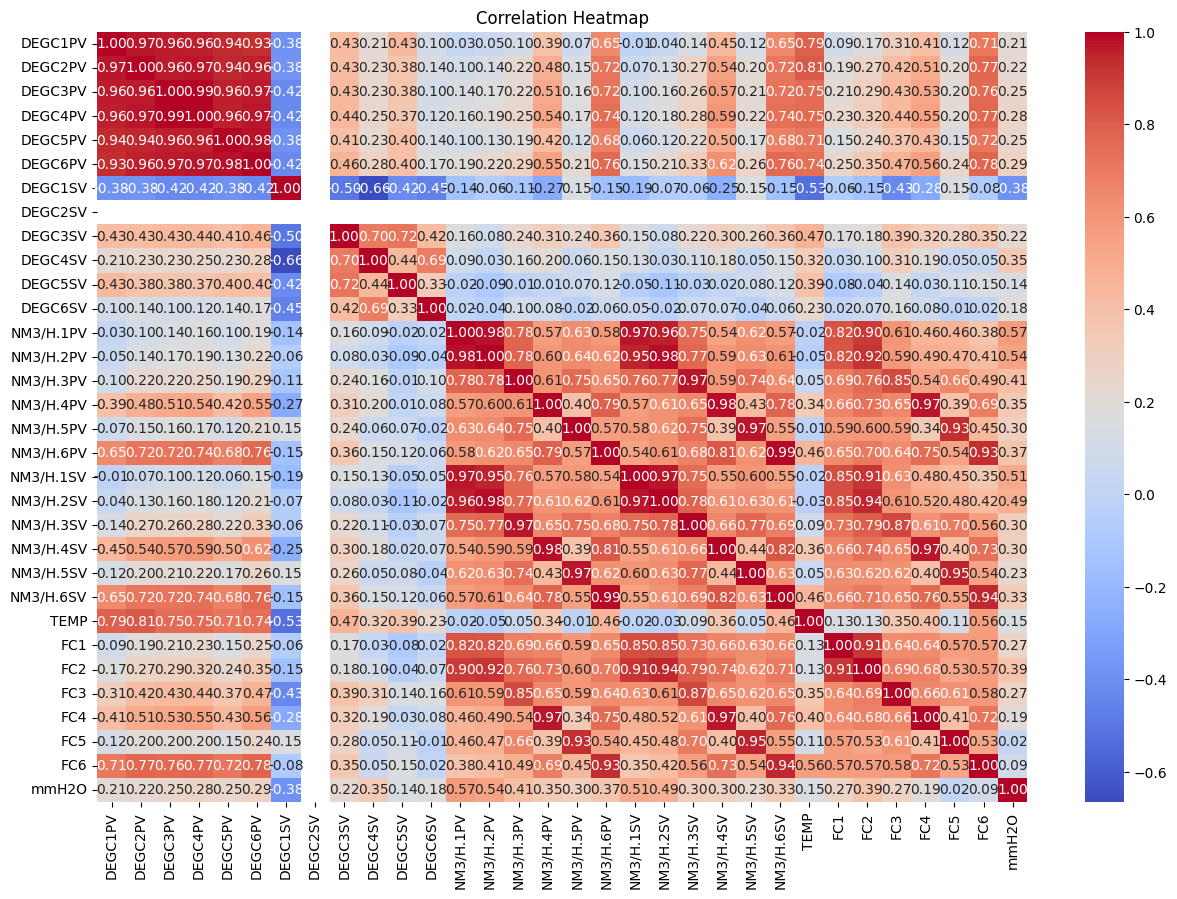

In [10]:
#2. 시각화
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#3. ML모델 선정 : LinearRegression, DecisionTreeRegression 선정
#4. 데이터셋 분리 : 이미 데이터가 학습 데이터와 훈련 데이터로 분리되어 있음.
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Define features and target variable
X = train_df.drop('mmH2O', axis=1)
y = train_df['mmH2O']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    me = np.mean(y_pred - y_true)  # 평균 오차 (예측값 - 실제값)
    mae = mean_absolute_error(y_true, y_pred)  # 평균 절대 오차
    mse = mean_squared_error(y_true, y_pred)  # 평균 제곱 오차
    rmse = np.sqrt(mse)  # 평균 제곱근 오차

    # Conditional MSLE calculation
    if (y_true > 0).all() and (y_pred > 0).all():
        msle = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))  # 평균 제곱 오차 (로그 적용)
        rmsle = np.sqrt(msle)  # 평균 제곱근 오차 (로그 적용)
    else:
        msle = np.nan
        rmsle = np.nan

    mpe = np.mean((y_pred - y_true) / y_true) * 100  # 평균 비율 오차
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # 평균 절대 비율 오차
    r2 = r2_score(y_true, y_pred)  # R2 점수
    return {
        "ME": me,
        "MAE": mae,
        "MSE": mse,
        "MSLE": msle,
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MPE": mpe,
        "MAPE": mape,
        "R2": r2
    }

# Initialize models
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor()
}

#5.학습실행( Train and evaluate models)
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check for invalid prediction values
    if (y_pred < 0).any():
        print(f"Warning: Model {name} produced negative predictions. Adjusting values to zero.")
        y_pred = np.maximum(y_pred, 0)  # Replace negative predictions with 0

    results[name] = evaluate_model(y_test, y_pred)

# Format evaluation results for consistent decimal places
evaluation_results = pd.DataFrame(results)
evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")

# Display formatted results
print("\nModel Evaluation Results:")
print(evaluation_results)

# Add explanations for each metric in Korean
metric_explanations = {
    "ME": "평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.",
    "MAE": "평균 절대 오차 (Mean Absolute Error): 예측값과 실제값의 절대적 차이의 평균. 낮을수록 좋음.",
    "MSE": "평균 제곱 오차 (Mean Squared Error): 예측값과 실제값의 제곱 차이 평균. 낮을수록 좋음.",
    "MSLE": "평균 제곱 오차 (로그 적용, Mean Squared Log Error): 로그 스케일에서의 평균 제곱 오차. 낮을수록 좋음.",
    "RMSE": "평균 제곱근 오차 (Root Mean Squared Error): 평균 제곱 오차의 제곱근. 낮을수록 좋음.",
    "RMSLE": "평균 제곱근 오차 (로그 적용, Root Mean Squared Log Error): 로그 스케일에서의 제곱근 오차. 낮을수록 좋음.",
    "MPE": "평균 비율 오차 (Mean Percentage Error): 예측값과 실제값의 비율 오차 평균. 0에 가까울수록 좋음.",
    "MAPE": "평균 절대 비율 오차 (Mean Absolute Percentage Error): 절대 비율 오차의 평균. 낮을수록 좋음.",
    "R2": "R2 점수 (Coefficient of Determination): 모델의 설명력을 나타냄. 1에 가까울수록 좋음.",
}

# Append explanations to results
print("\nModel Evaluation Results with Explanations:")
for metric, explanation in metric_explanations.items():
    print(f"{metric}: {explanation}")
    print(evaluation_results.loc[metric])
    print()



Model Evaluation Results:
      Multiple Linear Regression Decision Tree Regression
ME                     -1.660523                 0.109827
MAE                    21.640142                 2.257225
MSE                   753.866046                31.965318
MSLE                    0.013176                 0.000103
RMSE                   27.456621                 5.653788
RMSLE                   0.114788                 0.010142
MPE                     1.527132                 0.024625
MAPE                    5.528758                 0.418747
R2                      0.856182                 0.993902

Model Evaluation Results with Explanations:
ME: 평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.
Multiple Linear Regression    -1.660523
Decision Tree Regression       0.109827
Name: ME, dtype: object

MAE: 평균 절대 오차 (Mean Absolute Error): 예측값과 실제값의 절대적 차이의 평균. 낮을수록 좋음.
Multiple Linear Regression    21.640142
Decision Tree Regression       2.257225
Name: MAE, dtype: object

MSE: 평균 제곱 오차 (

In [14]:
#6. 새 데이터로 예측(Prediction)
test_input = pd.DataFrame(
    [[784,726.8,875.1,880.1,656.3,611.7,1005,1070,1215,1200,1140,1130,2566,2289,2646,7542,1598,3302,2600,2200,2001,2450,1600,3298,509.9,12.1,7,15,20.2,4.6,24.6]],
    columns=['DEGC1PV','DEGC2PV','DEGC3PV','DEGC4PV','DEGC5PV','DEGC6PV','DEGC1SV','DEGC2SV','DEGC3SV','DEGC4SV','DEGC5SV','DEGC6SV','NM3/H.1PV','NM3/H.2PV','NM3/H.3PV','NM3/H.4PV','NM3/H.5PV','NM3/H.6PV','NM3/H.1SV','NM3/H.2SV','NM3/H.3SV','NM3/H.4SV','NM3/H.5SV','NM3/H.6SV','TEMP','FC1','FC2','FC3','FC4','FC5','FC6']
)

# Predictions for test input
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(test_input)[0]

# Format predictions for consistent decimal places
predictions_df = pd.DataFrame(predictions, index=["mmH2O"]).applymap(lambda x: f"{x:.6f}")

# Display predictions
print("\nPredicted Volume for Input:")
print(predictions_df)


Predicted Volume for Input:
       Multiple Linear Regression Decision Tree Regression
Volume                 629.034307               620.000000


In [25]:
#7. 최적화 실행하여 학습 재실행 : 모델 변경함으로써 최적화 수행.
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check for invalid prediction values
    if (y_pred < 0).any():
        print(f"Warning: Model {name} produced negative predictions. Adjusting values to zero.")
        y_pred = np.maximum(y_pred, 0)  # Replace negative predictions with 0

    results[name] = evaluate_model(y_test, y_pred)

# Format evaluation results for consistent decimal places
evaluation_results = pd.DataFrame(results)
evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")

# Display formatted results
print("\nModel Evaluation Results:")
print(evaluation_results)

# Add explanations for each metric in Korean
metric_explanations = {
    "ME": "평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.",
    "MAE": "평균 절대 오차 (Mean Absolute Error): 예측값과 실제값의 절대적 차이의 평균. 낮을수록 좋음.",
    "MSE": "평균 제곱 오차 (Mean Squared Error): 예측값과 실제값의 제곱 차이 평균. 낮을수록 좋음.",
    "MSLE": "평균 제곱 오차 (로그 적용, Mean Squared Log Error): 로그 스케일에서의 평균 제곱 오차. 낮을수록 좋음.",
    "RMSE": "평균 제곱근 오차 (Root Mean Squared Error): 평균 제곱 오차의 제곱근. 낮을수록 좋음.",
    "RMSLE": "평균 제곱근 오차 (로그 적용, Root Mean Squared Log Error): 로그 스케일에서의 제곱근 오차. 낮을수록 좋음.",
    "MPE": "평균 비율 오차 (Mean Percentage Error): 예측값과 실제값의 비율 오차 평균. 0에 가까울수록 좋음.",
    "MAPE": "평균 절대 비율 오차 (Mean Absolute Percentage Error): 절대 비율 오차의 평균. 낮을수록 좋음.",
    "R2": "R2 점수 (Coefficient of Determination): 모델의 설명력을 나타냄. 1에 가까울수록 좋음.",
}

# Append explanations to results
print("\nModel Evaluation Results with Explanations:")
for metric, explanation in metric_explanations.items():
    print(f"{metric}: {explanation}")
    print(evaluation_results.loc[metric])
    print()


#from sklearn.model_selection import cross_val_score, cross_validate

#score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#print(score)

#8. 새로운 데이터로 예측(Prediction)
test_input = pd.DataFrame(
    [[784,726.8,875.1,880.1,656.3,611.7,1005,1070,1215,1200,1140,1130,2566,2289,2646,7542,1598,3302,2600,2200,2001,2450,1600,3298,509.9,12.1,7,15,20.2,4.6,24.6]],
    columns=['DEGC1PV','DEGC2PV','DEGC3PV','DEGC4PV','DEGC5PV','DEGC6PV','DEGC1SV','DEGC2SV','DEGC3SV','DEGC4SV','DEGC5SV','DEGC6SV','NM3/H.1PV','NM3/H.2PV','NM3/H.3PV','NM3/H.4PV','NM3/H.5PV','NM3/H.6PV','NM3/H.1SV','NM3/H.2SV','NM3/H.3SV','NM3/H.4SV','NM3/H.5SV','NM3/H.6SV','TEMP','FC1','FC2','FC3','FC4','FC5','FC6']
)

# Predictions for test input
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(test_input)[0]

# Format predictions for consistent decimal places
predictions_df = pd.DataFrame(predictions, index=["mmH2O"]).applymap(lambda x: f"{x:.6f}")

# Display predictions
print("\nPredicted Volume for Input:")
print(predictions_df)



Model Evaluation Results:
      Ridge Regression Lasso Regression Elastic Net Regression  \
ME           -1.660642        -1.710312              -1.787043   
MAE          21.640442        21.604393              22.234733   
MSE         753.874257       758.639014             794.307503   
MSLE          0.013178         0.013600               0.014903   
RMSE         27.456771        27.543402              28.183462   
RMSLE         0.114796         0.116618               0.122076   
MPE           1.527421         1.590633               1.787730   
MAPE          5.529108         5.592435               5.901150   
R2            0.856181         0.855272               0.848467   

      Random Forest Regression    XGBoost  
ME                    0.191908  -0.049330  
MAE                   2.518410   3.385369  
MSE                  29.540344  54.136560  
MSLE                  0.000122   0.000215  
RMSE                  5.435103   7.357755  
RMSLE                 0.011027   0.014670  
MPE 